In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
diabetes_dataset = pd.read_csv('diabetes_data_upload.csv')
diabetes_dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
diabetes_dataset.shape

(520, 17)

In [4]:
diabetes_dataset['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

In [5]:
X = diabetes_dataset.drop (columns='class', axis=1)
Y = diabetes_dataset['class']

In [6]:
print(X)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1   

In [7]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64


In [8]:
scaler = StandardScaler()

In [9]:
classifier = LogisticRegression()

In [10]:
scaler.fit(X)

StandardScaler()

In [11]:
standarized_data = scaler.transform(X)

In [12]:
print(standarized_data)

[[-0.6613669   0.76509206 -0.99233705 ...  1.29099445  1.38022749
   2.21564684]
 [ 0.82136224  0.76509206 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.57899306  0.76509206  1.00772212 ...  1.29099445  1.38022749
  -0.45133547]
 ...
 [ 0.82136224 -1.30703226  1.00772212 ...  1.29099445 -0.72451824
   2.21564684]
 [-1.32035762 -1.30703226 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.49661921  0.76509206 -0.99233705 ... -0.77459667 -0.72451824
  -0.45133547]]


In [13]:
X = standarized_data
Y = diabetes_dataset['class']

In [14]:
print(X)
print(Y)

[[-0.6613669   0.76509206 -0.99233705 ...  1.29099445  1.38022749
   2.21564684]
 [ 0.82136224  0.76509206 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.57899306  0.76509206  1.00772212 ...  1.29099445  1.38022749
  -0.45133547]
 ...
 [ 0.82136224 -1.30703226  1.00772212 ...  1.29099445 -0.72451824
   2.21564684]
 [-1.32035762 -1.30703226 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.49661921  0.76509206 -0.99233705 ... -0.77459667 -0.72451824
  -0.45133547]]
0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(520, 16) (416, 16) (104, 16)


In [17]:
classifier = svm.SVC(kernel='linear')

In [18]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [19]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [20]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.9423076923076923


In [21]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [22]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.9326923076923077


In [23]:
input_data = (40, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Pasien tidak terkena diabetes')
else :
  print('Pasien terkena diabetes')

[[-0.6613669   0.76509206 -0.99233705  1.10984668 -0.84626923  0.83959397
  -0.91512613 -0.53584393 -0.90102535  1.02729546 -0.56550593  1.08431186
  -0.86991767  1.29099445  1.38022749  2.21564684]]
[0]
Pasien tidak terkena diabetes


d:\anaconda1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
# Preprocessing
X = diabetes_dataset.drop(columns='class', axis=1)
Y = diabetes_dataset['class']

In [25]:
# Standarisasi data
scaler = StandardScaler()
scaler.fit(X)
standarized_data = scaler.transform(X)
X = standarized_data

In [26]:
# Membagi data ke dalam set pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Melatih model SVM
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [27]:
# Prediksi dan akurasi data pelatihan dan pengujian
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

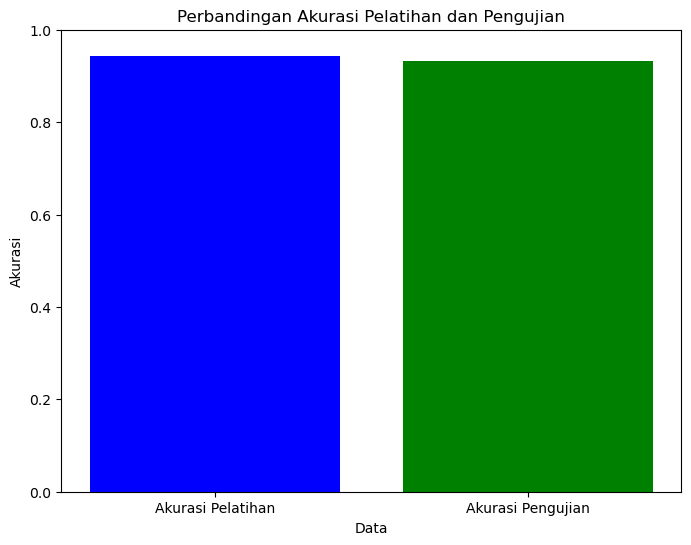

In [28]:
# Visualisasi

accuracy_scores = [training_data_accuracy, test_data_accuracy]
accuracy_labels = ['Akurasi Pelatihan', 'Akurasi Pengujian']

plt.figure(figsize=(8, 6))
plt.bar(accuracy_labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Data')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Pelatihan dan Pengujian')
plt.ylim([0, 1])
plt.show()

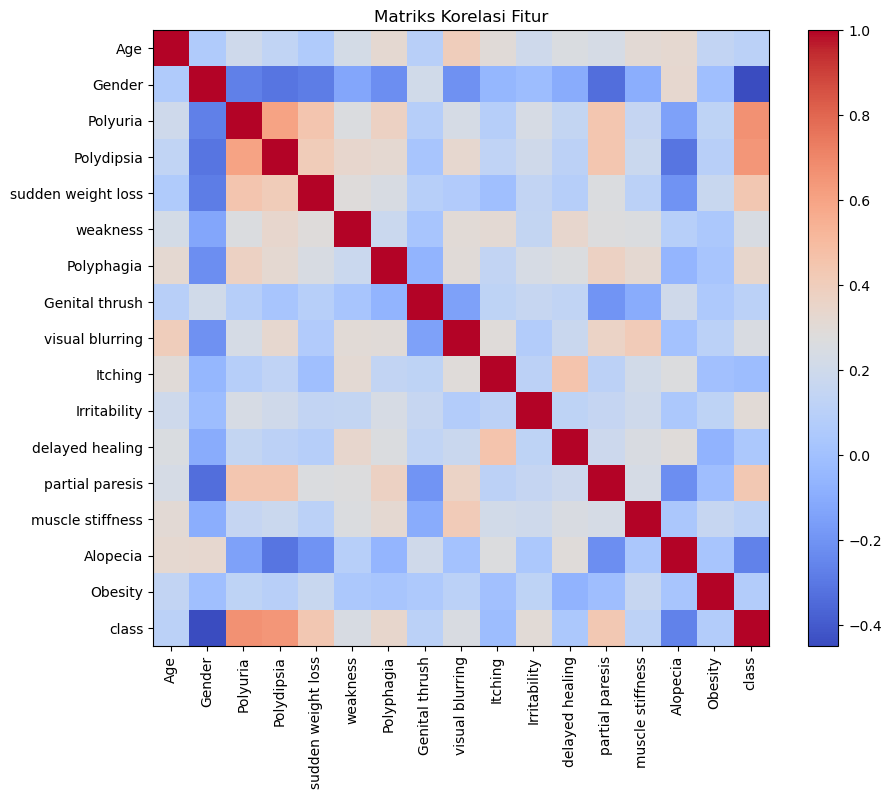

In [29]:
# Visualisasi korelasi fitur
correlation_matrix = diabetes_dataset.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriks Korelasi Fitur')
plt.show()

In [30]:
import pickle

In [31]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))